## Unpickle my Pitchfork_df 

In [2]:
import pandas as pd
import re
import pickle
import string

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Pickle in test reviews:

In [3]:
Pitchfork_tm = pd.read_pickle("./Pitchfork_unpick.pkl")
Pitchfork_tm

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


In [3]:
for content in Pitchfork_tm.Contents:
    print(content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Import Preprocessing Modules

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jcnachman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jcnachman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preprocessing 
- Remove Characters and Replace Certain words based on topic modeling results in JoannaN_Topic_Modeling1 notebook

In [16]:
# Remove review that has no review

In [17]:
Pitchfork_tm = Pitchfork_tm[Pitchfork_tm.Publication != 'No publication']
Pitchfork_tm

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


In [18]:
# Text preprocessing steps 
# remove numbers, capital letters and punctuation
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x) #remove numbers
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) # can i put & back in?
# punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ') # can i put & back in?

# # Replacing words
each_sunday = lambda x: x.replace('each sunday  pitchfork takes an in depth look at a significant album from the past  and any record not in our archives is eligible','')
today_pitch = lambda x: x.replace('today on pitchfork  we are taking a critical look at','')
today_revisit = lambda x: x.replace('today we revisit','')
today_revisit2 = lambda x: x.replace('today  we revisit','')
today_todayon = lambda x: x.replace('today on pitchfork  we are publishing new reviews of five important early stereolab records  each one a rung on the ladder of one of the most exceptional and historically influential bands','')
sub_gogos = lambda x: x.replace('go gos', 'go_go')
sub_gogo = lambda x: x.replace('go go', 'go_go')
sub_dre = lambda x: x.replace('dres', 'dre')
sub_rap = lambda x: x.replace('raps', 'rap')
sub_rapper = lambda x: x.replace('rappers', 'rapper')
sub_hiphop = lambda x: x.replace('hip hop', 'hiphop')
sub_songwriting = lambda x: x.replace('song writing', 'song writing')
sub_rems = lambda x: x.replace('r e m s', 'rem')
sub_rem = lambda x: x.replace('r e m', 'rem')
sub_danfrom = lambda x: x.replace('danfrom', 'dan from')
sub_kdlangs = lambda x: x.replace('k d langs', 'kdlang')
sub_kdlang = lambda x: x.replace('k d lang', 'kdlang')
sub_lofi = lambda x: x.replace('lo fi', 'lofi')
sub_las = lambda x: x.replace('l a s', 'la')
sub_la = lambda x: x.replace('l a', 'la')
sub_dc = lambda x: x.replace('washington d c', 'washington_dc')
sub_gogos = lambda x: x.replace('leader s', 'leaders')
sub_rb = lambda x: re.sub('r b','r&b', x)
sub_rbs = lambda x: re.sub('r bs','r&b', x)
sub_kpop = lambda x: x.replace('k pop','kpop')
sub_tswift = lambda x: x.replace('swiftfrom','swift from')
new_york = lambda x: x.replace('new york', 'new_york')
max_b = lambda x: x.replace('max b', 'max_b')
jim_jones = lambda x: x.replace('jim jones', 'jim_jones')
nwa = lambda x: x.replace('n w a', 'nwa')
u_s_a = lambda x: x.replace('the united states', 'the_united_states')
u_k = lambda x: x.replace('u k', 'uk')
up_and_comers = lambda x: x.replace('up and comers', 'up_and_comers')
in_depth = lambda x: x.replace('in depth', 'in-depth')
sub_band = lambda x: x.replace('bands', 'band')
sub_album = lambda x: x.replace('albums', 'album')
sub_song = lambda x: x.replace('songs', 'song')
rom_com = lambda x: x.replace('rom com', 'rom-com')
long_shot = lambda x: x.replace('long shot', 'long-shot')
in_memory_of = lambda x: x.replace('in memory of', 'in-memory-of')
dmsr = lambda x: x.replace('d m s r','dmsr')

machinehey = lambda x: x.replace('machinehey','machine hey')
notoriousb = lambda x: x.replace('notorious b i g','notorious big')
notoriousbig = lambda x: x.replace('notorious b i g s','notorious big')
krit = lambda x: x.replace('k r i t','krit')
mafia = lambda x: x.replace('m a f i a','mafia')

In [19]:
# Dealing with 'Contents' column
Pitchfork_tm['Contents'] = Pitchfork_tm.Contents.map(alphanumeric).map(punc_lower).map(each_sunday).map(sub_gogo).map(sub_gogos).map(sub_dre).map(sub_rap).map(sub_rapper).map(sub_hiphop).map(sub_songwriting).map(today_pitch).map(today_revisit).map(today_revisit2).map(today_todayon).map(sub_rems).map(sub_rem).map(sub_danfrom).map(sub_kdlangs).map(sub_kdlang).map(sub_lofi).map(sub_las).map(sub_la).map(sub_dc).map(sub_gogos).map(sub_rb).map(sub_rbs).map(sub_kpop).map(sub_tswift).map(new_york).map(max_b).map(jim_jones).map(nwa).map(u_s_a).map(u_k).map(up_and_comers).map(in_depth).map(sub_band).map(sub_album).map(sub_song).map(rom_com).map(long_shot).map(in_memory_of).map(dmsr).map(machinehey).map(notoriousb).map(notoriousbig).map(krit).map(mafia)


### Drop Publication column

In [20]:
Pitchfork_tm = Pitchfork_tm.drop(columns = 'Publication')

In [21]:
Pitchfork_tm.head()

,Author,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
4,Paul A. Thompson,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...


### Stopwords

In [22]:
# list out all my stopwords 
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
# adding words to list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('like')
stopwords.append('didnt')
stopwords.append('wasnt')
stopwords.append('music')

In [24]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Topic Modeling with gensim
- From here [Topic Modeling](http://localhost:8888/notebooks/curriculum/project-04/topic-modeling/JoannaN_LDA_Exercise.ipynb)

In [25]:
# gensim
from gensim import corpora, models, similarities, matutils

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [26]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

count_vectorizer.fit(Pitchfork_tm.Contents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(Pitchfork_tm.Contents).transpose()

In [28]:
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186
aaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaa powerline,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
doc_word.shape

(465383, 1187)

### Convert to gensim

In [30]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

##### Map matrix rows to words (tokens)


In [31]:
# Save a mapping (dict) of row id to word (token) for later use by gensim

In [32]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [33]:
len(id2word)

465383

## Non-Negative Matrix Factorization (NMF)

● NMF models are interpretable (unlike PCA)

● Easy to interpret means easy to explain! 

[NMF AWS](https://s3.amazonaws.com/assets.datacamp.com/production/course_3161/slides/ch4_slides.pdf)

In this example, we are going to start with documents that contain many unique words (or features). The goal is to reduce those words down into 2 topics, so that each document can be represented as some combination of the 2 topics. We will be using NMF this time around.

In [34]:
from sklearn.decomposition import NMF
import numpy as np
import random

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

import pprint

In [35]:
ex_label = [e[:30]+"..." for e in Pitchfork_tm.Contents]
ex_label

['the kpop groups latest is part...',
 'the danish dj courtesys label ...',
 'the composer and jazz multi in...',
 'rising new_york fixtures acemo...',
 'on their latest collaboration ...',
 'the latest in springsteens vin...',
 'on his solo album  the london ...',
 'marco del rios song are full o...',
 '   type o negatives third albu...',
 'the band new lp is a rosily op...',
 'the hardcore quartets   minute...',
 'on their second album  the met...',
 'grimes first project as a bona...',
 'the uk singer songwriters   al...',
 'the afghan whigs leaders debut...',
 'assisted by the falls late mar...',
 'the lanky london outlaw with c...',
 'the duo continue their drift f...',
 'two archival releases highligh...',
 'maya bons diaristic bedroom ro...',
 'with its mix of rustic lullabi...',
 'after a mixtape staking his cl...',
 'using a fanciful palette of ch...',
 'the veteran djs first solo ep ...',
 'the pop star returns with a gr...',
 'the new_york city based concep...',
 'the instru

### Shuffle through min_df and max_df to find the optimum balance and plot the graph


In [38]:
vectorizer_list = []

In [39]:
for min_d in range(1,20,2):
    for max_d in range(9,20,2):
        max_d = max_d/100
        vectorizer = CountVectorizer(stop_words=stopwords,binary=True,min_df=min_d,max_df=max_d)
        doc_word = vectorizer.fit_transform(Pitchfork_tm.Contents)
        vectorizer_list.append([vectorizer.min_df, vectorizer.max_df, doc_word.shape[1]])

Columns:

vectorizer.min_df, vectorizer.max_df, doc_word(words)

In [40]:
vectorizer_list

[[1, 0.09, 48989],
 [1, 0.11, 49130],
 [1, 0.13, 49218],
 [1, 0.15, 49298],
 [1, 0.17, 49348],
 [1, 0.19, 49391],
 [3, 0.09, 17869],
 [3, 0.11, 18010],
 [3, 0.13, 18098],
 [3, 0.15, 18178],
 [3, 0.17, 18228],
 [3, 0.19, 18271],
 [5, 0.09, 12197],
 [5, 0.11, 12338],
 [5, 0.13, 12426],
 [5, 0.15, 12506],
 [5, 0.17, 12556],
 [5, 0.19, 12599],
 [7, 0.09, 9344],
 [7, 0.11, 9485],
 [7, 0.13, 9573],
 [7, 0.15, 9653],
 [7, 0.17, 9703],
 [7, 0.19, 9746],
 [9, 0.09, 7566],
 [9, 0.11, 7707],
 [9, 0.13, 7795],
 [9, 0.15, 7875],
 [9, 0.17, 7925],
 [9, 0.19, 7968],
 [11, 0.09, 6298],
 [11, 0.11, 6439],
 [11, 0.13, 6527],
 [11, 0.15, 6607],
 [11, 0.17, 6657],
 [11, 0.19, 6700],
 [13, 0.09, 5387],
 [13, 0.11, 5528],
 [13, 0.13, 5616],
 [13, 0.15, 5696],
 [13, 0.17, 5746],
 [13, 0.19, 5789],
 [15, 0.09, 4704],
 [15, 0.11, 4845],
 [15, 0.13, 4933],
 [15, 0.15, 5013],
 [15, 0.17, 5063],
 [15, 0.19, 5106],
 [17, 0.09, 4124],
 [17, 0.11, 4265],
 [17, 0.13, 4353],
 [17, 0.15, 4433],
 [17, 0.17, 4483],
 [17,

## Plot this drop off

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
test_file = np.array(vectorizer_list)

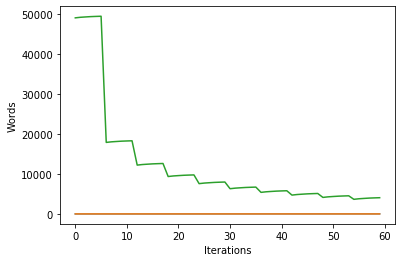

In [43]:
plt.plot(test_file)
plt.xlabel('Iterations')
plt.ylabel('Words')
plt.show()

In [44]:
# I want at least 10K words, so I'll go with this one:  [5, 0.19, 12578],

In [45]:
## Run NMF with parameters from vectorizer_list[17]: [5, 0.19, 12583]
vectorizer = CountVectorizer(stop_words=stopwords,binary=True, min_df=5, max_df=.19) 
doc_word = vectorizer.fit_transform(Pitchfork_tm.Contents)

In [46]:
vectorizer

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.19, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [47]:
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).shape

(1187, 12599)

In [48]:
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=True).describe()

count    12599.000000
mean        22.619017
std         30.222608
min          5.000000
25%          7.000000
50%         11.000000
75%         24.000000
max        225.000000
dtype: float64

Default run: 

We have 48337 words.

Our **average** word shows up in *8 docs*

Our **median (50%)** word shows up in *2 docs*

Customized run 2: vectorizer = CountVectorizer(stop_words=stopwords,binary=True, min_df=5, max_df=.19):
    
We have and 12602 words.

**Average** word shows up in *23 docs*.

**Median (50%)** word shows up in *11 docs*.

### Try 10 topics - 1 per Genre

In [49]:
Pitchfork_tm.Genre.value_counts()

Rock            378
Electronic      186
Rap             180
Pop/R&B         142
Experimental    119
Folk/Country     58
No genre         53
Jazz             36
Metal            26
Global            9
Name: Genre, dtype: int64

In [50]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

In [51]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())
topic_word

,aaron,abandon,abandoned,abandoning,abandonment,abandons,abiding,abilities,ability,abject,able,ableton,abound,abrasive,abroad,abrupt,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,abstract,abstracted,abstraction,abstractions,absurd,absurdist,absurdity,abundance,abuse,abused,abusive,abyss,ac,academic,academy,accelerates,accelerating,accent,accents,accentuated,accentuates,accept,acceptance,accepted,accepting,access,accessibility,accessible,accident,accidental,accidentally,acclaim,acclaimed,accommodate,accompanied,accompanies,accompaniment,accompany,accompanying,accomplished,accomplishes,accordance,according,accordingly,accordion,account,accounts,accumulated,accurate,accurately,accused,accustomed,acerbic,ache,achieve,achieved,achievement,achieves,achieving,aching,achingly,acid,acidic,acknowledge,acknowledged,acknowledges,acknowledging,acknowledgment,acoustic,acoustics,acquired,acrobatic,acrobatics,act,acted,acting,action,actions,active,actively,activism,activist,activists,activities,activity,actor,actors,actress,acts,actual,actualization,actually,acumen,acute,acutely,ad,adam,adamant,adams,adaptation,adapted,adapting,add,added,addict,addiction,adding,addition,additional,addres,addresed,addreses,addresing,adds,adele,adept,adjacent,adjust,administration,admirable,admirably,admiration,admire,admired,admirers,admiring,admission,admit,admits,admitted,admittedly,admitting,adolescence,adolescent,adopted,adopting,adopts,adoration,adored,adoring,adorn,adrenaline,adrenalized,adrian,adrift,ads,adult,adulthood,adults,advance,advanced,advancing,advantage,adventure,adventures,adventurous,adventurousness,advertising,advice,advocate,aesthetic,aesthetically,aesthetics,afar,affair,affairs,affect,affectation,affecting,affection,affiliated,affiliation,affinity,affirmation,affirmations,affirming,afford,afforded,affords,afloat,aforementioned,afraid,africa,african,africas,afro,afrobeat,afropop,afterlife,aftermath,afternoon,aftertaste,afterthought,afterthoughts,age,aged,agency,agenda,agent,ages,aggression,aggressive,aggressively,aggro,agile,aging,agitated,agnostic,ago,agony,agree,agreed,ah,ahead,ai,aid,aided,aids,aim,aimed,aiming,aimless,aims,aint,air,aired,...,whites,whitney,whod,whoever,whole,wholesome,wholly,whos,whove,wicked,wide,widely,widening,wider,widescreen,widespread,wield,wielded,wielding,wields,wife,wild,wilderness,wildly,wildness,willalways,willand,willfully,william,williams,willie,willing,willingness,willow,wilson,wilsons,win,wind,winding,window,windows,winds,windshield,wine,wing,winged,wings,wink,winking,winner,winning,wins,winsome,winter,winters,wipe,wiped,wire,wired,wires,wiry,wisconsin,wisdom,wise,wisely,wiser,wish,wished,wishes,wishing,wispy,wistful,wit,witch,withdrawn,withdrew,within,withstand,witness,witty,wives,wizard,wizardry,wizards,wobble,wobbling,wobbly,woke,wolf,woman,womans,women,womens,wonder,wondered,wonderful,wonderfully,wondering,wonders,wondrous,wont,woo,wood,wooden,woods,woodstock,woodwind,woodwinds,woozy,wop,word,wordless,wordplay,wordy,wore,worked,worker,workers,working,workmanlike,workout,workouts,works,workshop,worldly,worlds,worldview,worldwide,worn,worried,worries,worry,worrying,worse,worship,worshipping,worst,worth,worthwhile,worthy,wouldnt,wouldve,wound,wounded,wounds,woven,wow,wracked,wrap,wrapped,wrapping,wreckage,wrenching,wrestle,wrestled,wrestles,wrestling,wretched,wring,wringing,wrings,wrist,writ,write,writer,writers,writes,writhing,writing,written,wrld,wrong,wrote,wrought,wry,wryly,wu,wyatt,xcx,xs,xx,xxl,xxxtentacion,ya,yacht,yachty,yall,yang,yard,yawns,ye,yeah,yeahs,yearn,yearning,yearns,yeezus,yell,yelling,yellow,yells,yelp,yelping,yelps,yes,yesterday,yg,yield,yielded,yielding,yields,yin,yip,yo,yoga,yore,youd,youkeep,youknow,youll,younger,youngest,youngs,yous,youth,youthful,youths,youtube,youve,yr,yung,yves,zack,zane,zaytoven,zealand,zedd,zeitgeist,zen,zenith,zeppelin,zero,zeroes,ziggy,zine,zombie,zombies,zone,zoo,zs
component_1,0.004,0.043,0.133,0.004,0.009,0.000,0.000,0.024,0.012

In [52]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [53]:
display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic


Topic  0
became, told, fans, five, came, show, wanted, new_york, tour, took, felt, final, played, playing, began

Topic  1
electronic, ambient, synths, dance, techno, beats, club, noise, rhythms, producers, mix, ep, melodies, dancefloor, dj

Topic  2
rapper, beats, lil, rapping, hiphop, produced, shit, star, flow, verses, baby, features, verse, trying, hook

Topic  3
songwriter, someone, shes, writing, emotional, songwriting, feeling, singing, closer, alone, indie, folk, acoustic, relationship, room

Topic  4
quite, ambient, anything, given, human, upon, least, true, trying, thought, soft, air, form, head, none

Topic  5
jazz, notes, musicians, recording, john, recordings, playing, form, original, history, piece, group, drummer, version, familiar

Topic  6
singles, woman, hits, women, girl, wrote, culture, shes, stars, dance, selling, audience, put, top, story

Topic  7
history, political, inspired, white, american, experience, used, modern, art, perhaps, soundtrack, change, inside, r

### What are these topics about?
- Topic 0 appears to be about guitarists, drummers, shows

- Topic 1 appears to be about electronic/dance and jazz music

- Topic 2 appears to be about rap & hiphop

- Topic 3 appears to be about songwriting and folk/indie music

- Topic 4 appears to be about poetry imagery?

- Topic 5 appears to be about history, american musicians and country

- Topic 6 appears to be about singles/hits and indie music

- Topic 7 appears to be about history, political, modern, and american music

- Topic 8 appears to be about the future of music

- Topic 9 appears to be about women writers, singles/hits, and sex

In [56]:
H = pd.DataFrame(doc_topic.round(10),
             index = ex_label,
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"])
H = H.reset_index() # This looks better
H

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,the kpop groups latest is part...,0.000000,0.174154,0.574070,0.021047,0.049495,0.002532,0.280843,0.148090,0.071851,0.091886
1,the danish dj courtesys label ...,0.007294,0.480586,0.000000,0.103826,0.111514,0.000000,0.004006,0.002073,0.020276,0.000000
2,the composer and jazz multi in...,0.000000,0.097584,0.160823,0.000000,0.098438,0.489362,0.050177,0.060805,0.000000,0.000000
3,rising new_york fixtures acemo...,0.000000,0.534349,0.153268,0.000000,0.000000,0.000000,0.000000,0.013400,0.080500,0.000000
4,on their latest collaboration ...,0.000000,0.190978,0.480900,0.043679,0.000812,0.146537,0.000000,0.049331,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1182,despite trending toward pop in...,0.000000,0.222141,0.360667,0.000000,0.000000,0.000000,0.053662,0.051364,0.000000,0.093836
1183,on her supposedly final mixtap...,0.000000,0.149647,0.387621,0.053255,0.007732,0.012264,0.000000,0.009306,0.000000,0.030551
1184,though its undermined by its i...,0.000000,0.026421,0.491277,0.241466,0.096478,0.000000,0.076378,0.017969,0.000000,0.000000
1185,on an album that mines failed ...,0.065858,0.016228,0.000000,0.761279,0.074335,0.000000,0.000000,0.000000,0.000000,0.000000


### Masks for specific key where component_1 > Other Components

In [57]:
mask1 = ((H['component_1'] > H['component_2']) & (H['component_1'] > H['component_3']) & (H['component_1'] > H['component_4']) & (H['component_1'] > H['component_5']) & (H['component_1'] > H['component_6']) & (H['component_1'] > H['component_7']) & (H['component_1'] > H['component_8']) & (H['component_1'] > H['component_9']) & (H['component_1'] > H['component_10']))
H[mask1]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
8,type o negatives third albu...,1.397653,0.000000,0.000000,0.074292,0.240634,0.000000,0.000000,0.000000,0.000000,0.000000
98,a pure and quiet record fro...,0.712750,0.000000,0.000000,0.611619,0.000000,0.236404,0.370407,0.156456,0.000000,0.162639
142,blink third album a defi...,1.429347,0.000000,0.000000,0.000000,0.000000,0.000000,0.228416,0.112258,0.000000,0.000000
192,the safdie brothers adam sandl...,0.231282,0.177410,0.121644,0.055015,0.048212,0.216776,0.058081,0.000000,0.034143,0.026500
213,an essential new vinyl box set...,0.718302,0.136962,0.000000,0.628774,0.064333,0.000000,0.193595,0.000000,0.098130,0.208175
217,my chemical romances second...,1.237496,0.007757,0.000000,0.229625,0.014429,0.000000,0.000000,0.000000,0.000000,0.000000
237,this five disc set which incl...,0.240239,0.046567,0.078328,0.000000,0.033189,0.179209,0.036407,0.085675,0.008766,0.092332
241,the rolling stones album ...,0.887705,0.201908,0.000000,0.000000,0.031262,0.819136,0.000000,0.000000,0.100466,0.155995
267,steely dan from their early c...,0.477205,0.092353,0.000000,0.286313,0.000000,0.000749,0.282499,0.000000,0.067015,0.005539
268,steely dan from their early c...,0.699046,0.000000,0.145606,0.216981,0.000000,0.137228,0.000000,0.059311,0.105787,0.045203


In [58]:
H[mask1].count()

index           49
component_1     49
component_2     49
component_3     49
component_4     49
component_5     49
component_6     49
component_7     49
component_8     49
component_9     49
component_10    49
dtype: int64

In [59]:
Pitchfork_tm.index[H[mask1].index]

Index(['8', '98', '142', '192', '213', '217', '237', '241', '267', '268', '269', '270', '271', '279', '325', '329', '351', '352', '375', '381', '398', '399', '408', '423', '441', '471', '479', '486', '518', '556', '564', '585', '610', '636', '643', '768', '792', '798', '816', '833', '862', '915', '920', '922', '944', '965', '1108', '1114', '1144'], dtype='object')

In [60]:
# Print the articles for those reviews
index_pos1 = Pitchfork_tm.index[H[mask1].index]

#### Do these component_1 albums appear to be similar?

In [61]:
Pitchfork_tm.iloc[index_pos1].head()

,Author,Artist,Album_Name,Genre,Score,Contents
8,Chris O'Connell,Type O Negative,Bloody Kisses,Metal,8.7,type o negatives third album a brooding an...
98,Sam Sodomsky,Dixie Chicks,Home,Folk/Country,8.1,a pure and quiet record from when the di...
142,Jeremy Gordon,Blink-182,Enema of the State,Rock,7.5,blink third album a defining moment in b...
192,Mina Tavakoli,Daniel Lopatin,Uncut Gems (Original Motion Picture Soundtrack),Experimental,7.4,the safdie brothers adam sandler vehicle is re...
213,Quinn Moreland,Beat Happening,We Are Beat Happening,Rock,8.5,an essential new vinyl box set collects all of...


In [62]:
Pitchfork_component1 = Pitchfork_tm.iloc[index_pos1]
Pitchfork_component1.head()

,Author,Artist,Album_Name,Genre,Score,Contents
8,Chris O'Connell,Type O Negative,Bloody Kisses,Metal,8.7,type o negatives third album a brooding an...
98,Sam Sodomsky,Dixie Chicks,Home,Folk/Country,8.1,a pure and quiet record from when the di...
142,Jeremy Gordon,Blink-182,Enema of the State,Rock,7.5,blink third album a defining moment in b...
192,Mina Tavakoli,Daniel Lopatin,Uncut Gems (Original Motion Picture Soundtrack),Experimental,7.4,the safdie brothers adam sandler vehicle is re...
213,Quinn Moreland,Beat Happening,We Are Beat Happening,Rock,8.5,an essential new vinyl box set collects all of...


In [63]:
# Are the genres mostly consistent? Yea, the majority are rock. 
Pitchfork_component1.Genre.value_counts()

Rock            37
Metal            4
No genre         3
Pop/R&B          2
Electronic       1
Folk/Country     1
Experimental     1
Name: Genre, dtype: int64

**Remember, Component 1 = Topic 0:**

fans, guitarist, drummer, playing, came, shows, bit, played, five, show, sounded, group, guitars, final, became

Top Genre: Rock

This seems to match nicely. 

In [64]:
Pitchfork_component1.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [65]:
Pitchfork_component1['Score'] = Pitchfork_component1['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
# Are the scores mostly consistent? Yes, mean & median(50%) are very close
Pitchfork_component1.Score.describe()

count    49.000000
mean      8.146939
std       0.944524
min       5.000000
25%       7.700000
50%       8.100000
75%       8.800000
max      10.000000
Name: Score, dtype: float64

**_Let's do this with the other component types_**:
### Masks for specific key where component_2 > Other Components

In [67]:
mask2 = ((H['component_2'] > H['component_1']) & (H['component_2'] > H['component_3']) & (H['component_2'] > H['component_4']) & (H['component_2'] > H['component_5']) & (H['component_2'] > H['component_6']) & (H['component_2'] > H['component_7']) & (H['component_2'] > H['component_8']) & (H['component_2'] > H['component_9']) & (H['component_2'] > H['component_10']))
H[mask2]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
1,the danish dj courtesys label ...,0.007294,0.480586,0.000000,0.103826,0.111514,0.000000,0.004006,0.002073,0.020276,0.000000
3,rising new_york fixtures acemo...,0.000000,0.534349,0.153268,0.000000,0.000000,0.000000,0.000000,0.013400,0.080500,0.000000
6,on his solo album the london ...,0.000000,0.282461,0.005904,0.276105,0.062815,0.000000,0.054823,0.016367,0.000000,0.035578
7,marco del rios song are full o...,0.010072,0.162200,0.000000,0.125451,0.034502,0.073715,0.000000,0.020212,0.098550,0.115456
11,on their second album the met...,0.072276,0.254729,0.000000,0.108947,0.000000,0.000000,0.048305,0.028512,0.000000,0.136470
15,assisted by the falls late mar...,0.090256,0.163272,0.043120,0.092362,0.030572,0.104256,0.013653,0.063367,0.006007,0.079628
22,using a fanciful palette of ch...,0.046998,0.371552,0.000000,0.203902,0.000000,0.007051,0.000000,0.000000,0.036520,0.000000
23,the veteran djs first solo ep ...,0.000000,0.583643,0.000000,0.146903,0.061383,0.000000,0.091822,0.000000,0.017038,0.005780
25,the new_york city based concep...,0.000000,0.366152,0.111995,0.137458,0.000000,0.116577,0.021973,0.105323,0.000000,0.000000
31,on his fourth album kevin par...,0.142882,0.478892,0.161956,0.312269,0.000000,0.088532,0.000000,0.000000,0.000000,0.076460


In [68]:
H[mask2].count()

index           283
component_1     283
component_2     283
component_3     283
component_4     283
component_5     283
component_6     283
component_7     283
component_8     283
component_9     283
component_10    283
dtype: int64

In [69]:
index_pos2 = Pitchfork_tm.index[H[mask2].index]

In [70]:
# Print the articles for those reviews
Pitchfork_tm.iloc[index_pos2].head()

,Author,Artist,Album_Name,Genre,Score,Contents
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
6,Jemima Skala,Sega Bodega,Salvador,Electronic,7.2,on his solo album the london producer cloaks ...
7,Colin Joyce,Raspberry Bulbs,Before the Age of Mirrors,No genre,7.1,marco del rios song are full of riffs that bec...
11,Noah Yoo,Loathe,I Let It In and It Took Everything,Metal,7.8,on their second album the metalcore band wide...


In [71]:
Pitchfork_component2 = Pitchfork_tm.iloc[index_pos2]
Pitchfork_component2.head()

,Author,Artist,Album_Name,Genre,Score,Contents
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
6,Jemima Skala,Sega Bodega,Salvador,Electronic,7.2,on his solo album the london producer cloaks ...
7,Colin Joyce,Raspberry Bulbs,Before the Age of Mirrors,No genre,7.1,marco del rios song are full of riffs that bec...
11,Noah Yoo,Loathe,I Let It In and It Took Everything,Metal,7.8,on their second album the metalcore band wide...


In [72]:
# Are the genres mostly consistent? Yea, the majority are electronic. Then experimental then rock. 
Pitchfork_component2.Genre.value_counts()

Electronic      136
Experimental     56
Rock             46
No genre         19
Pop/R&B          11
Metal             8
Global            3
Jazz              2
Folk/Country      2
Name: Genre, dtype: int64

**Remember, Component 2 = Topic  1:**

electronic, ambient, synths, dance, techno, melody, beats, rhythms, mix, percussion, club, jazz, based, noise, deep

Top Genre: electronic.

This seems to match up too.

In [73]:
Pitchfork_component2.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [74]:
Pitchfork_component2['Score'] = Pitchfork_component2['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
Pitchfork_component2['Score_int'] = Pitchfork_component2['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
Pitchfork_component2.dtypes

Author         object
Artist         object
Album_Name     object
Genre          object
Score         float64
Contents       object
Score_int       int64
dtype: object

In [77]:
# Are the scores mostly consistent? Yes, mean & median(50%) are very close
Pitchfork_component2.Score_int.describe()

count    283.000000
mean       6.872792
std        0.793190
min        4.000000
25%        7.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_3 > Other Components

In [78]:
mask3 = ((H['component_3'] > H['component_1']) & (H['component_3'] > H['component_2']) & (H['component_3'] > H['component_4']) & (H['component_3'] > H['component_5']) & (H['component_3'] > H['component_6']) & (H['component_3'] > H['component_7']) & (H['component_3'] > H['component_8']) & (H['component_3'] > H['component_9']) & (H['component_3'] > H['component_10']))
H[mask3]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,the kpop groups latest is part...,0.000000,0.174154,0.574070,0.021047,0.049495,0.002532,0.280843,0.148090,0.071851,0.091886
4,on their latest collaboration ...,0.000000,0.190978,0.480900,0.043679,0.000812,0.146537,0.000000,0.049331,0.000000,0.000000
21,after a mixtape staking his cl...,0.000000,0.111846,0.650296,0.000000,0.004610,0.000000,0.042562,0.034764,0.000000,0.009754
35,on his collaboration with kenn...,0.000000,0.114399,0.672546,0.000000,0.000000,0.000000,0.015790,0.005297,0.000000,0.017313
36,the rising brooklyn rapper new...,0.040256,0.150165,0.428591,0.085678,0.000000,0.009746,0.000000,0.000000,0.011658,0.000000
40,the enigmatic rapper debut lp ...,0.023279,0.000000,0.301615,0.285291,0.012927,0.145342,0.000000,0.000000,0.001711,0.036615
48,the memphis rapper offers hard...,0.044770,0.000000,0.443730,0.066851,0.000000,0.000000,0.000000,0.033950,0.000000,0.005793
49,the earl sweatshirt collaborat...,0.000000,0.124177,0.357348,0.121994,0.031947,0.142589,0.000000,0.000000,0.000000,0.000000
56,working with lil peep collabor...,0.048602,0.066000,0.711332,0.038767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66,with his big legacy album tha ...,0.025199,0.047471,0.525205,0.219358,0.147821,0.000000,0.000000,0.000000,0.010025,0.055265


In [79]:
H[mask3].count()

index           223
component_1     223
component_2     223
component_3     223
component_4     223
component_5     223
component_6     223
component_7     223
component_8     223
component_9     223
component_10    223
dtype: int64

In [80]:
Pitchfork_tm.index[H[mask3].index]

Index(['0', '4', '21', '35', '36', '40', '48', '49', '56', '66',
       ...
       '1165', '1168', '1177', '1178', '1180', '1181', '1182', '1183', '1184', '1186'], dtype='object', length=223)

In [81]:
index_pos3 = Pitchfork_tm.index[H[mask3].index]

In [82]:
# Print the articles for those reviews
Pitchfork_component3 = Pitchfork_tm.iloc[index_pos3]
Pitchfork_component3.head()

,Author,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
4,Paul A. Thompson,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
21,Nathan Smith,10k.Caash,Planet Swajjur,Rap,6.2,after a mixtape staking his claim to the woah ...
35,Alphonse Pierre,Denzel Curry / Kenny Beats,Unlocked,Rap,7.2,on his collaboration with kenny beats the mia...
36,Reed Jackson,Pop Smoke,Meet the Woo Vol. 2,Rap,7.3,the rising brooklyn rapper new mixtape gets ov...


In [83]:
# Are the genres mostly consistent? Yes, rap is by far the most frequent genre for this topic.
Pitchfork_component3.Genre.value_counts()

Rap             165
Pop/R&B          30
No genre          8
Rock              6
Electronic        4
Metal             3
Experimental      3
Global            2
Jazz              2
Name: Genre, dtype: int64

**Remember, Component 3 = Topic  2:**

rapper, beats, lil, rapping, hiphop, shit, produced, star, flow, verse, verses, features, trying, baby, hook

Top Genre: rap

This matches up too.

In [84]:
Pitchfork_component3.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [85]:
Pitchfork_component3['Score'] = Pitchfork_component3['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
Pitchfork_component3['Score_int'] = Pitchfork_component3['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
Pitchfork_component3.dtypes

Author         object
Artist         object
Album_Name     object
Genre          object
Score         float64
Contents       object
Score_int       int64
dtype: object

In [88]:
# Are the scores mostly consistent? Yea, mean and median (50%) are pretty close
Pitchfork_component3.Score_int.describe()

count    223.000000
mean       6.295964
std        1.291808
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max       10.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_4 > Other Components

In [89]:
mask4 = ((H['component_4'] > H['component_1']) & (H['component_4'] > H['component_2']) & (H['component_4'] > H['component_3']) & (H['component_4'] > H['component_5']) & (H['component_4'] > H['component_6']) & (H['component_4'] > H['component_7']) & (H['component_4'] > H['component_8']) & (H['component_4'] > H['component_9']) & (H['component_4'] > H['component_10']))
H[mask4]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
9,the band new lp is a rosily op...,0.046218,0.125259,0.026649,0.499323,0.000000,0.000000,0.206342,0.050063,0.000000,0.172496
12,grimes first project as a bona...,0.000000,0.056874,0.265184,0.356621,0.044441,0.000000,0.281819,0.328636,0.000000,0.057332
14,the afghan whigs leaders debut...,0.000750,0.133398,0.043375,0.142908,0.000000,0.084600,0.000000,0.047468,0.000000,0.131667
16,the lanky london outlaw with c...,0.081545,0.104245,0.000000,0.372337,0.112403,0.042143,0.026828,0.011857,0.015856,0.058159
17,the duo continue their drift f...,0.060648,0.082312,0.041674,0.207187,0.000000,0.000000,0.020987,0.000000,0.121827,0.137843
19,maya bons diaristic bedroom ro...,0.024297,0.063177,0.020886,0.311591,0.031749,0.000000,0.009453,0.000000,0.000000,0.000000
24,the pop star returns with a gr...,0.101856,0.000000,0.277593,0.465480,0.022326,0.000000,0.153063,0.000000,0.000000,0.000000
27,the oklahoma roots songwriter ...,0.022953,0.028539,0.020962,0.517550,0.079238,0.012253,0.071426,0.000000,0.000000,0.044536
29,the maryland crooners dreamy r...,0.052675,0.000000,0.224061,0.246203,0.025809,0.000000,0.000000,0.000000,0.029291,0.000000
30,setting aside the retro r&b va...,0.073130,0.029651,0.037498,0.289567,0.059249,0.073710,0.021273,0.000000,0.022232,0.037437


In [90]:
H[mask4].count()

index           360
component_1     360
component_2     360
component_3     360
component_4     360
component_5     360
component_6     360
component_7     360
component_8     360
component_9     360
component_10    360
dtype: int64

In [91]:
Pitchfork_tm.index[H[mask4].index]

Index(['9', '12', '14', '16', '17', '19', '24', '27', '29', '30',
       ...
       '1152', '1154', '1155', '1160', '1163', '1166', '1169', '1174', '1175', '1185'], dtype='object', length=360)

In [92]:
index_pos4 = Pitchfork_tm.index[H[mask4].index]

In [93]:
# Print the articles for those reviews
Pitchfork_component4 = Pitchfork_tm.iloc[index_pos4]
Pitchfork_component4.head()

,Author,Artist,Album_Name,Genre,Score,Contents
9,Arielle Gordon,Best Coast,Always Tomorrow,Rock,6.5,the band new lp is a rosily optimistic record ...
12,Anupa Mistry,Grimes,Miss Anthropocene,Pop/R&B,8.2,grimes first project as a bona fide pop star i...
14,Stuart Berman,Greg Dulli,Random Desire,Rock,7.3,the afghan whigs leaders debut solo album bala...
16,Jazz Monroe,King Krule,Man Alive!,Rock,7.7,the lanky london outlaw with cement mixer lung...
17,Evan Rytlewski,Tennis,Swimmer,Rock,6.9,the duo continue their drift from lofi throwba...


In [94]:
# Are the genres mostly consistent? Yes, rock is by far the highest, then pop/r&b.
Pitchfork_component4.Genre.value_counts()

Rock            190
Pop/R&B          64
Folk/Country     38
Electronic       23
Experimental     22
Rap              12
No genre          7
Metal             3
Jazz              1
Name: Genre, dtype: int64

**Remember, Component 4 = Topic  3:**

someone, songwriter, shes, writing, emotional, songwriting, singing, closer, indie, acoustic, alone, relationship, folk, room, finds

Top Genre: Rock

In [95]:
Pitchfork_component4.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [96]:
Pitchfork_component4['Score'] = Pitchfork_component4['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
Pitchfork_component4['Score_int'] = Pitchfork_component4['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
Pitchfork_component4.dtypes

Author         object
Artist         object
Album_Name     object
Genre          object
Score         float64
Contents       object
Score_int       int64
dtype: object

In [99]:
# Are the scores mostly consistent? Yea, mean and median (50%) are very close
Pitchfork_component4.Score_int.describe()

count    360.000000
mean       6.752778
std        0.918697
min        3.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_5 > Other Components

In [100]:
mask5 = ((H['component_5'] > H['component_1']) & (H['component_5'] > H['component_2']) & (H['component_5'] > H['component_3']) & (H['component_5'] > H['component_4']) & (H['component_5'] > H['component_6']) & (H['component_5'] > H['component_7']) & (H['component_5'] > H['component_8']) & (H['component_5'] > H['component_9']) & (H['component_5'] > H['component_10']))
H[mask5]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
938,an album that changed ambie...,0.0,0.0,0.0,0.0,5.590459,0.0,0.0,0.0,0.0,0.0


**Interesting, just one album**

In [101]:
Pitchfork_tm.index[H[mask5].index]

Index(['938'], dtype='object')

In [102]:
index_pos5 = Pitchfork_tm.index[H[mask5].index]

In [103]:
# Print the articles for those reviews
Pitchfork_component5 = Pitchfork_tm.iloc[index_pos5]
Pitchfork_component5

,Author,Artist,Album_Name,Genre,Score,Contents
938,Philip Sherburne,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,an album that changed ambient music forever...


In [104]:
# Are the genres mostly consistent? Well, there's only one.
Pitchfork_component5.Genre.value_counts()

Electronic    1
Name: Genre, dtype: int64

**Remember, Component 5 = Topic  4:**

quite, anything, given, human, ambient, thought, trying, true, close, least, soft, odd, upon, none, easy

Top Genre: Electronic

Score is in the 10 out of 10.

### Masks for specific key where component_6 > Other Components

In [105]:
mask6 = ((H['component_6'] > H['component_1']) & (H['component_6'] > H['component_2']) & (H['component_6'] > H['component_3']) & (H['component_6'] > H['component_4']) & (H['component_6'] > H['component_5']) & (H['component_6'] > H['component_7']) & (H['component_6'] > H['component_8']) & (H['component_6'] > H['component_9']) & (H['component_6'] > H['component_10']))
H[mask6]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
2,the composer and jazz multi in...,0.000000,0.097584,0.160823,0.000000,0.098438,0.489362,0.050177,0.060805,0.000000,0.000000
5,the latest in springsteens vin...,0.340405,0.000000,0.059396,0.127920,0.056788,0.749566,0.003181,0.000000,0.000000,0.089726
18,two archival releases highligh...,0.097775,0.000000,0.000000,0.000000,0.000000,1.142076,0.000000,0.000000,0.018024,0.000000
26,the instrumental duo go all in...,0.036030,0.072727,0.025127,0.132466,0.000000,0.313001,0.000000,0.004232,0.064748,0.000000
32,a new classical sextet known f...,0.000000,0.201274,0.042795,0.016953,0.001922,0.370486,0.007225,0.036534,0.000000,0.000000
47,in pauline oliveros coined ...,0.000000,0.212340,0.000000,0.000000,0.095866,0.587750,0.028248,0.099533,0.027962,0.000000
51,buffy sainte maries cosmic ...,0.075729,0.000000,0.000000,0.381059,0.182106,1.199847,0.615440,0.128484,0.004804,0.000000
52,after touring together the ps...,0.000000,0.111300,0.116572,0.011299,0.000000,0.210004,0.079350,0.037974,0.000000,0.015704
53,with cover song and a couple o...,0.069152,0.000000,0.000000,0.016876,0.000000,0.303467,0.211481,0.060583,0.004427,0.000000
54,the chicago drummer and produc...,0.108735,0.000000,0.047517,0.512760,0.087249,0.616450,0.000000,0.085247,0.144796,0.000000


In [106]:
Pitchfork_tm.index[H[mask6].index]

Index(['2', '5', '18', '26', '32', '47', '51', '52', '53', '54',
       ...
       '1105', '1110', '1130', '1138', '1141', '1142', '1153', '1171', '1172', '1179'], dtype='object', length=177)

In [107]:
index_pos6 = Pitchfork_tm.index[H[mask6].index]

In [108]:
# Print the articles for those reviews
Pitchfork_component6 = Pitchfork_tm.loc[index_pos6]
Pitchfork_component6

,Author,Artist,Album_Name,Genre,Score,Contents
2,Cat Zhang,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
5,Sam Sodomsky,Bruce Springsteen / The E Street Band,The Rising / Devils & Dust / Live in New York ...,Rock,8.2,the latest in springsteens vinyl reissue serie...
18,Andy Beta,Rashied Ali / Frank Lowe / Rashied Ali Quintet,First Time Out: Live at Slugs 1967 / Duo Excha...,Experimental,8.0,two archival releases highlight the range of j...
26,Steven Arroyo,Elkhorn,The Storm Sessions,Rock,6.2,the instrumental duo go all in on the possibil...
32,Seth Colter Walls,yMusic,Ecstatic Science,Pop/R&B,7.3,a new classical sextet known for pop adjacent ...
47,Jonathan Williger,Pauline Oliveros / Stuart Dempster / Panaiotis,Deep Listening,Electronic,9.2,in pauline oliveros coined the term deep li...
51,Lindsay Zoladz,Buffy Sainte-Marie,Illuminations,Rock,9.0,buffy sainte maries cosmic groundbreaking ...
52,Andy Beta,Khruangbin / Leon Bridges,Texas Sun EP,Rock,6.9,after touring together the psych funk trio an...
53,Alfred Soto,Bryan Ferry,"Live at the Royal Albert Hall, 1974",Electronic,7.5,with cover song and a couple of originals thi...
54,Mark Richardson,Gil Scott-Heron / Makaya McCraven,We’re New Again: A Reimagining by Makaya McCraven,Jazz,8.6,the chicago drummer and producer transforms gi...


In [109]:
# Are the genres mostly consistent? Yea, mostly rock, then folk/country
Pitchfork_component6.Genre.value_counts()

Rock            47
Experimental    36
Jazz            30
No genre        15
Electronic      14
Folk/Country    14
Pop/R&B         12
Metal            4
Global           3
Rap              2
Name: Genre, dtype: int64

**Remember, Component 6 = Topic  5:**

version, recording, original, history, american, musicians, known, story, country, became, written, white, john, found, wrote

Top Genre: rock

This seems to make sense.

In [110]:
Pitchfork_component6.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [111]:
Pitchfork_component6['Score'] = Pitchfork_component6['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [112]:
Pitchfork_component6['Score_int'] = Pitchfork_component6['Score'].astype(int)

In [113]:
# Are the scores mostly consistent? Yea, mean and median (50%) are pretty close
Pitchfork_component6['Score_int'].describe()

count    177.000000
mean       7.225989
std        0.944363
min        4.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_7 > Other Components

In [114]:
mask7 = ((H['component_7'] > H['component_1']) & (H['component_7'] > H['component_2']) & (H['component_7'] > H['component_3']) & (H['component_7'] > H['component_4']) & (H['component_7'] > H['component_5']) & (H['component_7'] > H['component_6']) & (H['component_7'] > H['component_8']) & (H['component_7'] > H['component_9']) & (H['component_7'] > H['component_10']))
H[mask7]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
13,the uk singer songwriters al...,0.422592,0.053452,0.000000,0.280695,0.072497,0.000000,0.429792,0.061475,0.035991,0.000000
59,the pop star attempts to be al...,0.006845,0.044822,0.206956,0.197065,0.000000,0.000000,0.235615,0.072462,0.000000,0.000000
74,shakiras big crossover reco...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.484790,0.000000,0.000000,0.000000
106,written from her own perspecti...,0.000000,0.043384,0.119433,0.304425,0.010418,0.000000,0.401882,0.060851,0.000000,0.020627
146,the second album written prod...,0.084347,0.180261,0.174491,0.005132,0.008879,0.000000,0.297088,0.026334,0.015233,0.000000
317,six years after their&breakout...,0.084481,0.173766,0.013190,0.228192,0.000000,0.000000,0.277262,0.157576,0.035941,0.150647
347,the viral phenoms full length ...,0.118498,0.084072,0.125537,0.222137,0.042278,0.094832,0.484512,0.021415,0.000000,0.017924
369,with harmonized guitars sprin...,0.134984,0.060209,0.167700,0.000000,0.097646,0.000000,0.273320,0.099622,0.017904,0.120370
447,an essential greatest hits ...,0.000000,0.103108,0.000000,0.000000,0.000000,0.000000,2.853849,0.000000,0.000000,0.367970
485,on a dozen song that transcend...,0.042085,0.000000,0.100756,0.187869,0.000000,0.215652,0.235792,0.015795,0.000000,0.181501


**Only 2 albums**

In [115]:
Pitchfork_tm.index[H[mask7].index]

Index(['13', '59', '74', '106', '146', '317', '347', '369', '447', '485', '519', '561', '583', '586', '618', '622', '668', '697', '704', '734', '797', '817', '831', '887', '901', '985', '995', '1015', '1025', '1040', '1067', '1093', '1115', '1125', '1145', '1170'], dtype='object')

In [116]:
index_pos7 = Pitchfork_tm.index[H[mask7].index]

In [117]:
# Print the articles for those reviews
Pitchfork_component7 = Pitchfork_tm.loc[index_pos7]
Pitchfork_component7.head()

,Author,Artist,Album_Name,Genre,Score,Contents
13,Ian Cohen,David Gray,White Ladder (20th Anniversary Edition),Pop/R&B,7.9,the uk singer songwriters album remains a ph...
59,Dani Blum,Meghan Trainor,Treat Myself,Pop/R&B,4.1,the pop star attempts to be all things to all ...
74,Isabelia Herrera,Shakira,Laundry Service,Pop/R&B,7.6,shakiras big crossover record that revealed...
106,Rawiya Kameir,Halsey,Manic,Pop/R&B,6.5,written from her own perspective halseys thir...
146,Anna Gaca,Georgia,Seeking Thrills,Pop/R&B,6.8,the second album written produced and perfor...


In [118]:
# Are the genres mostly consistent? One rock the other Pop/R&B.
Pitchfork_component7.Genre.value_counts()

Pop/R&B         22
Electronic       4
Rock             4
Folk/Country     3
Jazz             1
Rap              1
Global           1
Name: Genre, dtype: int64

**Remember, Component 7 = Topic  6:**

singles, group, singing, radio, version, major, help, sing, hits, collection, indie, already, whole, anthems, approach

ABBA's greatest hits are on here, so the singles topic makes sense.

In [119]:
Pitchfork_component7.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [120]:
Pitchfork_component7['Score'] = Pitchfork_component7['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [121]:
Pitchfork_component7['Score_int'] = Pitchfork_component7['Score'].astype(int)

In [122]:
# Are the scores mostly consistent? Yes, the average and median are the same
Pitchfork_component7['Score_int'].describe()

count    36.000000
mean      7.027778
std       1.158475
min       4.000000
25%       6.000000
50%       7.000000
75%       8.000000
max       9.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_8 > Other Components

In [123]:
mask8 = ((H['component_8'] > H['component_1']) & (H['component_8'] > H['component_2']) & (H['component_8'] > H['component_3']) & (H['component_8'] > H['component_4']) & (H['component_8'] > H['component_5']) & (H['component_8'] > H['component_6']) & (H['component_8'] > H['component_7']) & (H['component_8'] > H['component_9']) & (H['component_8'] > H['component_10']))
H[mask8]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
166,peter gabriels art pop ma...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.243123,0.0,0.0


**Just 2 albums in this topic**

In [124]:
Pitchfork_tm.index[H[mask8].index]

Index(['166'], dtype='object')

In [125]:
index_pos8 = Pitchfork_tm.index[H[mask8].index]

In [126]:
# Print the articles for those reviews
Pitchfork_component8 = Pitchfork_tm.iloc[index_pos8]
Pitchfork_component8

,Author,Artist,Album_Name,Genre,Score,Contents
166,Eric Harvey,Peter Gabriel,So,Rock,9.1,peter gabriels art pop masterpiece a tur...


In [127]:
# Are the genres mostly consistent? One is rock and the other is pop/r&b.
Pitchfork_component8.Genre.value_counts()

Rock    1
Name: Genre, dtype: int64

**Remember, Component 8 = Topic 7:**

history, political, inspired, modern, art, white, american, experience, experimental, era, help, perhaps, cultural, rest, side


In [128]:
Pitchfork_component8.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [129]:
Pitchfork_component8['Score'] = Pitchfork_component8['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
Pitchfork_component8['Score_int'] = Pitchfork_component8['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
# Are scores consistent? Yes, mean and median (50%) are the same
Pitchfork_component8['Score_int'].describe()

count    1.0
mean     9.0
std      NaN
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: Score_int, dtype: float64

### Masks for specific key where component_9 > Other Components

In [132]:
mask9 = ((H['component_9'] > H['component_1']) & (H['component_9'] > H['component_2']) & (H['component_9'] > H['component_3']) & (H['component_9'] > H['component_4']) & (H['component_9'] > H['component_5']) & (H['component_9'] > H['component_6']) & (H['component_9'] > H['component_7']) & (H['component_9'] > H['component_8']) & (H['component_9'] > H['component_10']))
H[mask9]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
28,the klfs sample heavy dream...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.55972,0.0


**Interesting, just one album.**

In [133]:
Pitchfork_tm.index[H[mask9].index]

Index(['28'], dtype='object')

In [134]:
index_pos9 = Pitchfork_tm.index[H[mask9].index]

In [135]:
# Print the article for that review
Pitchfork_component9 = Pitchfork_tm.iloc[index_pos9]
Pitchfork_component9

,Author,Artist,Album_Name,Genre,Score,Contents
28,Philip Sherburne,The KLF,Chill Out,Electronic,8.9,the klfs sample heavy dreamscape one of th...


Genre is electronic and score is 8.9.

Genre: Electronic
Score: 8.9

**Remember, Component 9 = Topic 8:**

mood, acoustic, heard, deep, future, lost, soul, strange, cover, exactly, uncanny, radio, voices, none, dream

### Masks for specific key where component_10 > Other Components

In [136]:
mask10 = ((H['component_10'] > H['component_1']) & (H['component_10'] > H['component_2']) & (H['component_10'] > H['component_3']) & (H['component_10'] > H['component_4']) & (H['component_10'] > H['component_5']) & (H['component_10'] > H['component_6']) & (H['component_10'] > H['component_7']) & (H['component_10'] > H['component_8']) & (H['component_10'] > H['component_9']))
H[mask10]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
10,the hardcore quartets minute...,0.160023,0.021584,0.000000,0.143891,0.000000,0.000000,0.020523,0.000000,0.000000,0.213008
20,with its mix of rustic lullabi...,0.000000,0.116815,0.000000,0.133173,0.000000,0.137103,0.006090,0.027246,0.042458,0.412849
55,alongside producer gil norton ...,0.085763,0.124235,0.118084,0.052560,0.000000,0.001734,0.000000,0.037310,0.025674,0.218352
58,the pop punk stalwarts resist ...,0.065771,0.000000,0.132606,0.000000,0.032676,0.044865,0.080284,0.065268,0.031038,0.171122
94,wolf parades latest album play...,0.043924,0.066292,0.058427,0.159171,0.000000,0.056384,0.014597,0.045262,0.034668,0.276181
117,with easy hooks surprise stru...,0.056075,0.000000,0.208602,0.209155,0.002428,0.061884,0.109455,0.083471,0.104099,0.250440
163,the long island emo outfit pus...,0.046413,0.000000,0.126919,0.229894,0.000000,0.000000,0.000000,0.059379,0.000000,0.329695
173,the australian garage rock ban...,0.007437,0.157928,0.058177,0.174320,0.000000,0.093407,0.059853,0.034177,0.071465,0.272436
234,the cantankerous smashing pump...,0.068113,0.000000,0.040750,0.207847,0.113726,0.203392,0.109270,0.000000,0.115037,0.260751
282,the second album from the mich...,0.109712,0.104636,0.116607,0.166029,0.034237,0.000000,0.000000,0.036613,0.000000,0.171803


In [137]:
Pitchfork_tm.index[H[mask10].index]

Index(['10', '20', '55', '58', '94', '117', '163', '173', '234', '282', '304', '327', '372', '382', '421', '422', '429', '453', '488', '508', '533', '574', '587', '612', '645', '673', '679', '753', '769', '770', '787', '812', '840', '855', '860', '861', '898', '907', '911', '918', '923', '924', '937', '946', '1004', '1023', '1042', '1056', '1068', '1073', '1102', '1117', '1137', '1164', '1167', '1176'], dtype='object')

In [138]:
index_pos10 = Pitchfork_tm.index[H[mask10].index]

In [139]:
# Print the article for those reviews
Pitchfork_component10 = Pitchfork_tm.iloc[index_pos10]
Pitchfork_component10

,Author,Artist,Album_Name,Genre,Score,Contents
10,Quinn Moreland,Soakie,Soakie,Rock,8.0,the hardcore quartets minute debut skewers a...
20,Stuart Berman,The Men,Mercy,Rock,7.2,with its mix of rustic lullabies and blown out...
55,Ian Cohen,Higher Power,27 Miles Underwater,Rock,7.0,alongside producer gil norton whose work defi...
58,Evan Rytlewski,Green Day,Father of All...,Rock,6.7,the pop punk stalwarts resist political commen...
94,Evan Rytlewski,Wolf Parade,Thin Mind,Rock,6.5,wolf parades latest album plays like the big l...
117,Stuart Berman,Kiwi Jr.,Football Money,Rock,7.7,with easy hooks surprise structural twists a...
163,Ian Cohen,Macseal,Super Enthusiast,Rock,6.3,the long island emo outfit pushes the classic ...
173,Evan Minsker,Eddy Current Suppression Ring,All in Good Time,Electronic,6.3,the australian garage rock band first album in...
234,Stuart Berman,William Patrick Corgan,Cotillions,Rock,6.4,the cantankerous smashing pumpkin embraces his...
282,Ian Cohen,Greet Death,New Hell,Rock,7.9,the second album from the michigan rock trio i...


In [140]:
# Are the genres mostly consistent? Most are pop/r&b and a lot are rock.
Pitchfork_component10.Genre.value_counts()

Rock            47
Metal            4
Electronic       2
Pop/R&B          1
Experimental     1
No genre         1
Name: Genre, dtype: int64

**Remember, Component 10 = Topic  9:**

girl, shes, woman, women, wrote, video, culture, stars, girls, sex, singles, told, today, hits, selling



In [141]:
Pitchfork_component10.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [142]:
Pitchfork_component10['Score'] = Pitchfork_component10['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
Pitchfork_component10['Score_int'] = Pitchfork_component10['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
# Are the scores mostly consistent? Yea, mean and median (50%) are very close
Pitchfork_component10.Score_int.describe()

count    56.000000
mean      6.642857
std       0.961600
min       4.000000
25%       6.000000
50%       7.000000
75%       7.000000
max       8.000000
Name: Score_int, dtype: float64